# National Crime Data by State

## Final Project : Data Visualization


### NOTE: Change the kernel to the type of your choice, `R` or `Python`.

  * Navigation: Kernel > Change Kernel > [Selection]


## Crime Trends Analysis 

### Data Files:
  
  * ../../../datasets/ucr_fbi/1994.csv
  * ../../../datasets/ucr_fbi/1996.csv
  * ../../../datasets/ucr_fbi/1998.csv
  * ../../../datasets/ucr_fbi/2000.csv
  * ../../../datasets/ucr_fbi/2002.csv
  * ../../../datasets/ucr_fbi/2004.csv
  * ../../../datasets/ucr_fbi/2006.csv
  * ../../../datasets/ucr_fbi/2008.csv
  * ../../../datasets/ucr_fbi/2010.csv
  * ../../../datasets/ucr_fbi/2012.csv
  * ../../../datasets/ucr_fbi/2014.csv



# Task 1)

Load data files into a collection of data frames.

In [1]:
import pandas as pd


In [2]:
# Add Your Code Below This Comment
# ---------------------------------

def file_to_df(year):
    fn = "../../../datasets/ucr_fbi/{}.csv".format(year)
    print("Loading: ", fn)
    df = pd.read_csv(fn)
    df['year'] = int(year)
    return (df)

# List Comprehension
# http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/
years = [year for year in range(1994,2015, 2)]
crime = [file_to_df(year) for year in years]
crime_all = pd.concat(crime)

print(crime_all.shape)


Loading:  ../../../datasets/ucr_fbi/1994.csv
Loading:  ../../../datasets/ucr_fbi/1996.csv
Loading:  ../../../datasets/ucr_fbi/1998.csv
Loading:  ../../../datasets/ucr_fbi/2000.csv
Loading:  ../../../datasets/ucr_fbi/2002.csv
Loading:  ../../../datasets/ucr_fbi/2004.csv
Loading:  ../../../datasets/ucr_fbi/2006.csv
Loading:  ../../../datasets/ucr_fbi/2008.csv
Loading:  ../../../datasets/ucr_fbi/2010.csv
Loading:  ../../../datasets/ucr_fbi/2012.csv
Loading:  ../../../datasets/ucr_fbi/2014.csv
(561, 24)


In [3]:
# Database Connections
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2

con = psycopg2.connect(database="dsa_ro", user="dsa_ro_user",password="readonly",host="dbase")

# Just fetch them all
#sql = "SELECT iso,name_1, the_geom "
#sql+= " FROM geospatial.gadm_admin_borders "
# sql+= " WHERE iso IN ('USA') "
# first = all_USA_gadm.dissolve(by=['name_1'])

# Just fetch them all, let DB merge into states
sql = "SELECT name_1, st_union(the_geom) as the_geom "
sql+= " FROM geospatial.gadm_admin_borders "
sql+= " WHERE iso IN ('USA') GROUP BY name_1"


# First order
first = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
first.head()

,name_1,the_geom
0,Alabama,(POLYGON ((-87.97000033635459 30.6766658709639...
1,Indiana,POLYGON ((-85.79229077224181 38.28736990298103...
2,Minnesota,POLYGON ((-91.85788669199019 44.19422858233611...
3,South Carolina,(POLYGON ((-80.70610781932965 32.3925017563287...
4,Louisiana,(POLYGON ((-89.37472508769315 28.9719453302086...


In [4]:
# Trim to lower 48 ... because
conus = first[(first.name_1 != 'Alaska') & (first.name_1 != 'Hawaii')]
conus.shape

(49, 2)

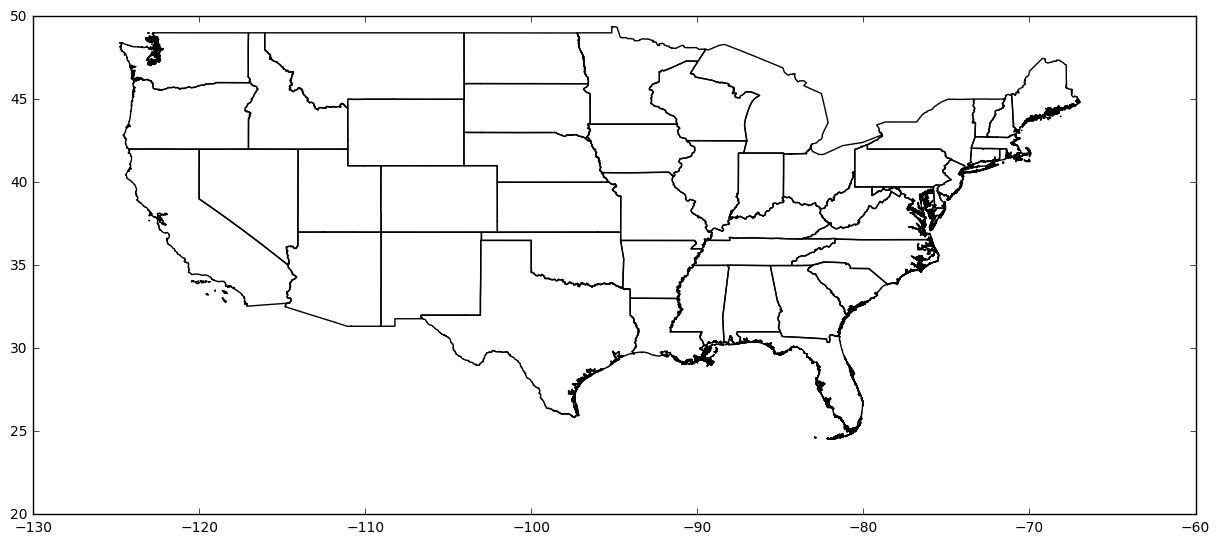

In [5]:
%matplotlib inline
conus.plot(figsize=(15,15), color='white');

### <span style="background:yellow">For each of the remaining tasks, as execution cells as you see fit.  Please keep them group with the task.</span>

# Task 2)
Produce basic visualizations for a few years to get a feeling for the descriptive statistics.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 3)

Produce basic visualizations for a few years to get a feeling for the bivariate relationships in variables within a same year.
E.g., Robbery versus Assult for 1994.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 4)

Produce basic visualizations for a of cross year bivariate relationships.
E.g., Robbery 1994 versus Assult for 1998.


In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 5)

Produce visualizations with regresssions lines for the strongest relationships.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 6)

Create Choropleth of key statistics you want to discuss based on your work so far.
Include every year and variable that is appropriate.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 7)

Choose a particular state, evaluate a relationship between two variables that are positively correlated and produce a sequential set of plots to show the trends in the relationship over time.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 8)

Pick a state, show the chronological choropleth for that state and a critical statistic.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 9)

From tasks 2-8, pull the most interesting visualizations and information down into this task.  Repeat the visualization in preparation of step 10.

In [ ]:
# Add Your Code Below This Comment
# ---------------------------------






# Task 10)

Provide your annotation and summary of your key visualizations from Task 9.

# SAVE YOUR NOTEBOOK